In [1]:
import json

In [ ]:
path_captions = "/Users/sergiosuzerainosson/Documents/project/universite_project/s4/modelisation_vision/image-caption-generation/data/interim/captions_all.json"
captions = json.load(open(path_captions))

frequencies = {}

for caption in captions:
    caption_im = caption['captions']
    for single_cap in caption_im:
        for word in [x for x in single_cap.split(" ") if x not in ['<start>', '<pad>', '<eos>']]:
            if word not in frequencies:
                frequencies[word] = 1
            else: 
                frequencies[word] += 1

from pprint import pprint
pprint(frequencies)

In [3]:
import matplotlib.pyplot as plt

def plot_top_bottom_words(freq_dict, top_n=25):
    # Sort the dictionary based on values (word counts)
    sorted_freq = sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)
    
    # Extract top and bottom words
    top_words = sorted_freq[:top_n]
    bottom_words = sorted_freq[-top_n:]
    
    # Unpack top and bottom words and their counts
    top_words, top_counts = zip(*top_words)
    bottom_words, bottom_counts = zip(*bottom_words)
    
    # Plotting
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot top words
    bars1 = axes[0].barh(top_words, top_counts, color='blue')
    axes[0].invert_yaxis()  # Invert y-axis to have the highest bar at the top
    axes[0].set_xlabel('Frequency')
    axes[0].set_title(f'Top {top_n} Most Used Words')
    
    # Add annotations for top words
    for bar, count in zip(bars1, top_counts):
        axes[0].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count}', 
                     va='center', ha='left', fontsize=10, color='black')
    
    # Plot bottom words
    bars2 = axes[1].barh(bottom_words, bottom_counts, color='red')
    axes[1].invert_yaxis()  # Invert y-axis to have the highest bar at the top
    axes[1].set_xlabel('Frequency')
    axes[1].set_title(f'Top {top_n} Least Used Words')
    
    # Add annotations for bottom words
    for bar, count in zip(bars2, bottom_counts):
        axes[1].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count}', 
                     va='center', ha='left', fontsize=10, color='black')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_top_bottom_words(frequencies, top_n=25)


amount of unique word predicted: 78


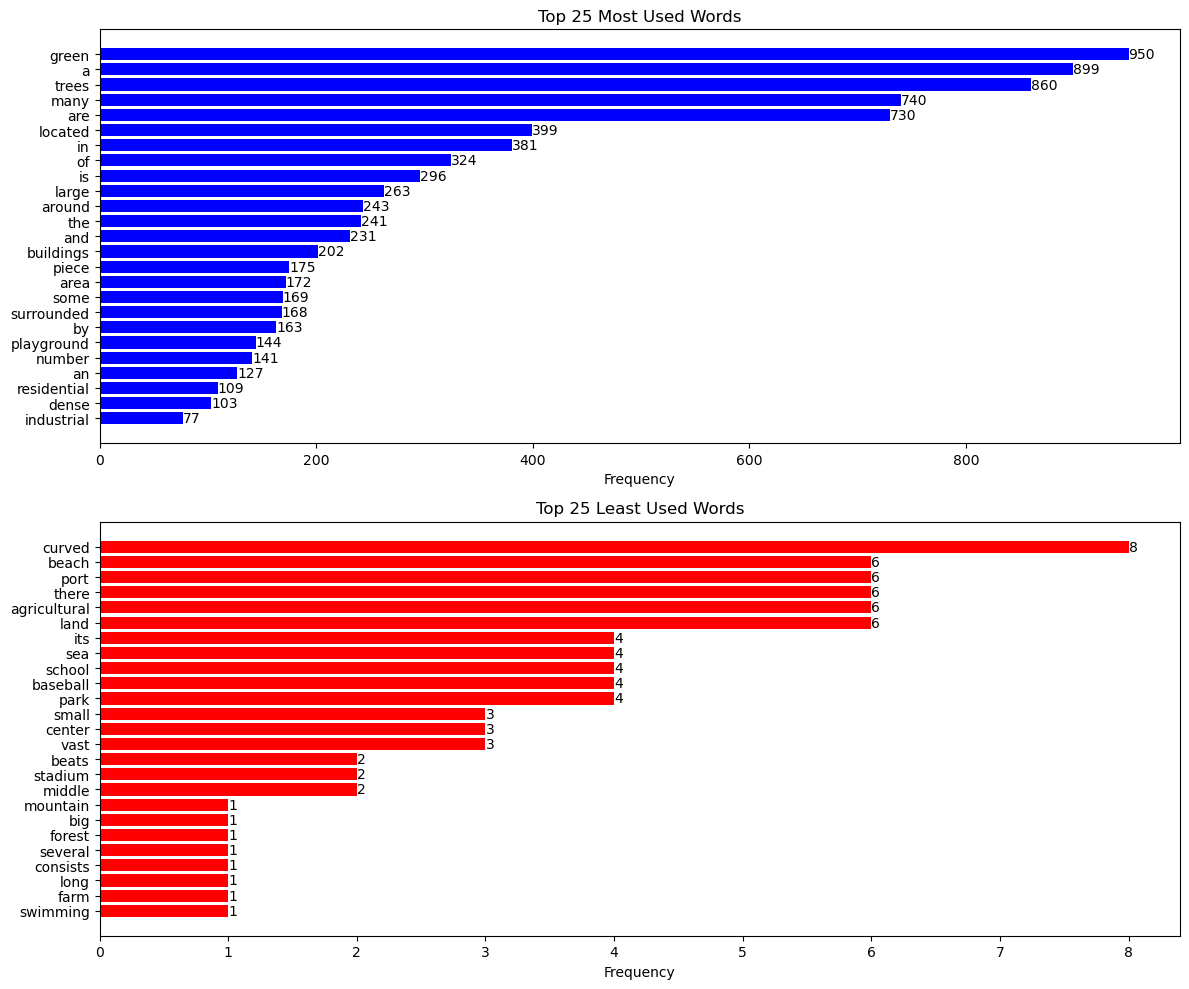

In [7]:
with open("/Users/sergiosuzerainosson/Documents/project/universite_project/s4/modelisation_vision/image-caption-generation/notebooks/test_predictions.txt", "r") as f:
    data = f.readlines()

frequencies_predicted = {}

for line in data:
    if "--> [" in line:
        # Find the position of the first '[' and ']'
        start_idx = line.find('[')
        end_idx = line.find(']')

        # Extract the text between '[' and ']'
        extracted_text = str(line[start_idx+2:end_idx-1])  # Adjust indices to exclude brackets and quotes
        for word in extracted_text.split(" "):
            if word not in frequencies_predicted:
                frequencies_predicted[word] = 1
            else: 
                frequencies_predicted[word] += 1

print(f"amount of unique word predicted: {len(frequencies_predicted)}")

plot_top_bottom_words(frequencies_predicted, top_n=25)

amount of unique word contained: 1560


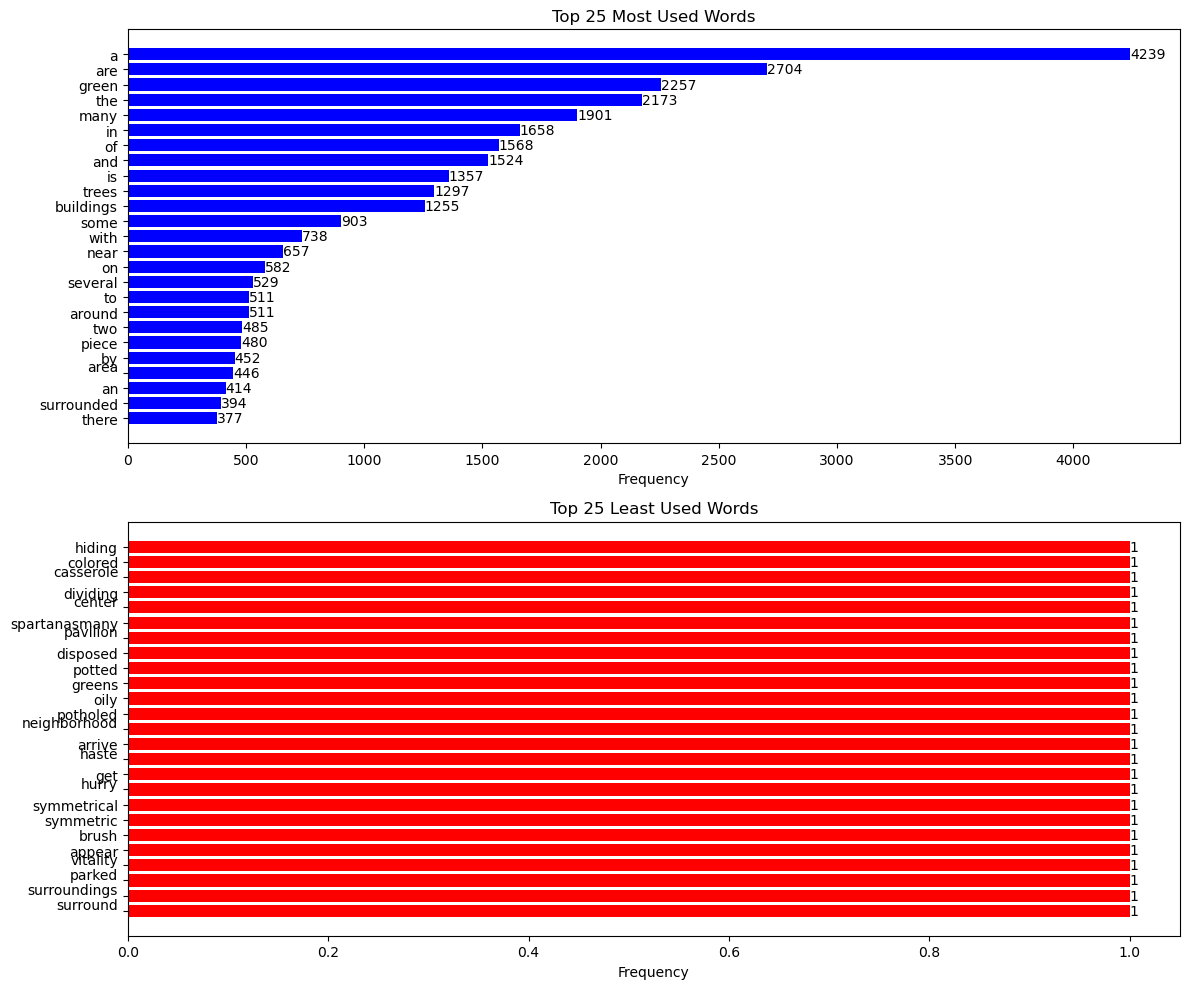

In [8]:
with open("/Users/sergiosuzerainosson/Documents/project/universite_project/s4/modelisation_vision/image-caption-generation/notebooks/test_predictions.txt", "r") as f:
    data = f.readlines()

frequencies_test = {}

for line in data:
    if "- " in line:
        line = line.split("- ")[1]
        # print(line)
        for word in line.split(" "):
            if word not in frequencies_test:
                frequencies_test[word] = 1
            else: 
                frequencies_test[word] += 1

print(f"amount of unique word contained: {len(frequencies_test)}")

plot_top_bottom_words(frequencies_test, top_n=25)